In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [31]:
spam_df=pd.read_csv(r"C:\Users\USER\Desktop\Spam.csv",encoding='latin-1')

In [32]:
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [33]:
data=data.rename(columns={'v1':'label','v2':'messsage'})

In [29]:
data.describe()

,spam
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [34]:
spam_df.groupby('v1').describe()

v2                                                                 \
     count unique                                                top freq   
v1                                                                          
ham   4825   4516                             Sorry, I'll call later   30   
spam   747    653  Please call our customer service representativ...    4   

     Unnamed: 2                                                            \
          count unique                                                top   
v1                                                                          
ham          45     39   bt not his girlfrnd... G o o d n i g h t . . .@"   
spam          5      4                                        PO Box 5249   

          Unnamed: 3                                    Unnamed: 4         \
     freq      count unique                    top freq      count unique   
v1                                                                          
ham     3         10      9                     GE    2          6      5   
spam    2          2      1   MK17 92H. 450Ppw 16"    2          0      0   

                    
          top freq  
v1                  
ham   GNT:-)"    2  
spam      NaN  NaN

In [35]:
data = spam_df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)


In [36]:
data.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [37]:
data['length']=data['messsage'].apply(len)

KeyError: 'messsage'

In [38]:
data['spam']=data['v1'].apply(lambda x:1 if x=='spam' else 0)

In [39]:
data.head()

,v1,v2,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [40]:
x_train, x_test, y_train, y_test = train_test_split(data.v2,data.v1, test_size=0.25)


In [41]:
x_train.describe()

count                       4179
unique                      3909
top       Sorry, I'll call later
freq                          24
Name: v2, dtype: object

In [42]:
vect = CountVectorizer()
X_train = vect.fit_transform(x_train.values)

In [43]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [45]:
email_ham=["baseball tickets later"]
email_ham1=vect.transform(email_ham)
model.predict(email_ham1)

array(['ham'], dtype='<U4')

In [46]:
email_spam=["reward money click"]
email_spam1=vect.transform(email_spam)
model.predict(email_spam1)

array(['spam'], dtype='<U4')

In [47]:
X_test=vect.transform(x_test)
model.score(X_test,y_test)

0.9813352476669059

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

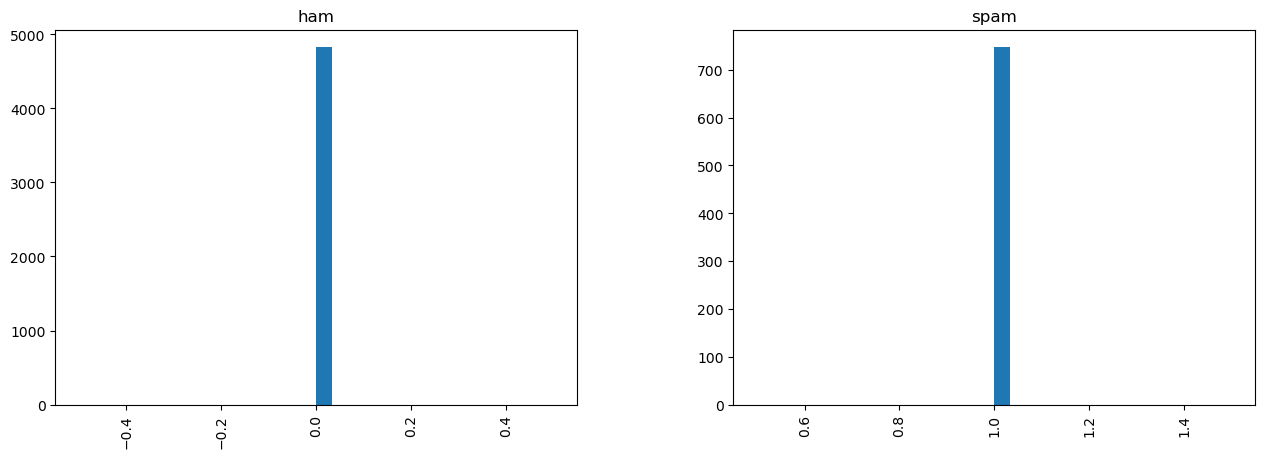

In [48]:
data.hist(by='v1',column='spam',bins=30,figsize=[15,5])
